In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('tmpdwak9k8f.csv')

In [3]:
df2018=df.loc[(df.date>='2018')&(df.date<'2019')]

df2019=df.loc[(df.date>='2019')&(df.date<'2020')]

df2020=df.loc[(df.date>='2020')&(df.date<'2021')]

df2021=df.loc[(df.date>='2021')&(df.date<'2022')]

df2022=df.loc[(df.date>='2022')&(df.date<'2023')]

In [4]:
neighborhoods_to_violations_dict2018=df2018['neighborhood'][(df2018['violation_type'] == 'Housing Complaints') | (df2018['violation_type'] == 'Housing Violations')].value_counts()

neighborhoods_to_violations_dict2019=df2019['neighborhood'][(df2019['violation_type'] == 'Housing Complaints') | (df2019['violation_type'] == 'Housing Violations')].value_counts()

neighborhoods_to_violations_dict2020=df2020['neighborhood'][(df2020['violation_type'] == 'Housing Complaints') | (df2020['violation_type'] == 'Housing Violations')].value_counts()

neighborhoods_to_violations_dict2021=df2021['neighborhood'][(df2021['violation_type'] == 'Housing Complaints') | (df2021['violation_type'] == 'Housing Violations')].value_counts()

neighborhoods_to_violations_dict2022=df2022['neighborhood'][(df2022['violation_type'] == 'Housing Complaints') | (df2022['violation_type'] == 'Housing Violations')].value_counts()

In [5]:
df_v=pd.DataFrame()

In [6]:

df_v['2018']=neighborhoods_to_violations_dict2018
df_v['2019']=neighborhoods_to_violations_dict2019
df_v['2020']=neighborhoods_to_violations_dict2020
df_v['2021']=neighborhoods_to_violations_dict2021
df_v['2022']=neighborhoods_to_violations_dict2022

In [7]:
df_v=df_v.reset_index()

In [8]:

df_v= df_v.rename(columns={'index': 'region'})

In [11]:
df_z=pd.read_csv('Neighborhood_zhvi.csv')

In [12]:
df_boston_zillow=df_z.loc[(df_z['RegionName'].isin(list(dict(neighborhoods_to_violations_dict2018).keys()))) & (df_z.City=='Boston') ]

In [13]:
df_z2022=df_boston_zillow.iloc[:, [2] + list(range(-10, -0))].reset_index()
df_z2021=df_boston_zillow.iloc[:, [2] + list(range(-22, -10))].reset_index()
df_z2020=df_boston_zillow.iloc[:, [2] + list(range(-34, -22))].reset_index()
df_z2019=df_boston_zillow.iloc[:, [2] + list(range(-46, -34))].reset_index()
df_z2018=df_boston_zillow.iloc[:, [2] + list(range(-58, -46))].reset_index()

In [14]:
df_z2018['mean']=df_z2018.iloc[:,2:].mean(axis=1)

df_z2019['mean']=df_z2019.iloc[:,2:].mean(axis=1)

df_z2020['mean']=df_z2020.iloc[:,2:].mean(axis=1)

df_z2021['mean']=df_z2021.iloc[:,2:].mean(axis=1)

df_z2022['mean']=df_z2022.iloc[:,2:].mean(axis=1)

In [15]:
df_p=pd.DataFrame()
df_p['region']=df_z2018['RegionName']

In [16]:
df_p['2018']=df_z2018['mean']
df_p['2019']=df_z2019['mean']
df_p['2020']=df_z2020['mean']
df_p['2021']=df_z2021['mean']
df_p['2022']=df_z2022['mean']

In [17]:
df_p_v = df_p.merge(df_v, on='region')

In [18]:
df_p_f=df_p_v.iloc[:,0:6]

In [19]:
df_p_f = df_p_f.rename({'2018_x': '2018', '2019_x': '2019','2020_x': '2020','2021_x': '2021','2022_x': '2022'}, axis='columns')

In [20]:
df_v_f=df_p_v.iloc[:, [0, 6, 7, 8, 9,10]]

In [21]:
df_v_f = df_v_f.rename({'2018_y': '2018', '2019_y': '2019','2020_y': '2020','2021_y': '2021','2022_y': '2022'}, axis='columns')

In [22]:
df_p_f

,region,2018,2019,2020,2021,2022
0,Roxbury,472349.583333,483873.416667,509885.583333,550048.000000,582564.4
1,Brighton,464581.250000,469286.916667,478309.833333,499455.333333,525156.2
2,Jamaica Plain,598381.583333,617622.166667,630998.333333,668569.500000,717825.3
3,East Boston,479679.166667,513488.333333,523595.916667,561924.000000,609667.5
4,South Boston,725957.500000,742612.000000,754743.166667,782296.833333,830923.1
5,Hyde Park,448166.916667,470850.083333,492688.333333,550092.916667,599635.8
6,West Roxbury,581581.750000,599255.750000,621856.416667,678813.000000,732539.3
7,Roslindale,529925.833333,552836.166667,570640.750000,617738.583333,674070.2
8,Allston,474277.583333,490200.583333,499086.916667,519458.000000,544315.1
9,Mattapan,428563.916667,437233.500000,467834.416667,514803.583333,555496.2


In [23]:
df_v_f

,region,2018,2019,2020,2021,2022
0,Roxbury,1178,1166,1081,1344,1035
1,Brighton,600,513,548,604,522
2,Jamaica Plain,640,604,510,530,515
3,East Boston,895,871,909,927,649
4,South Boston,776,771,947,1145,627
5,Hyde Park,497,441,457,480,344
6,West Roxbury,312,263,223,268,208
7,Roslindale,463,342,362,362,338
8,Allston,379,315,406,392,416
9,Mattapan,624,587,476,613,501


In [24]:
corr=df_v_f.iloc[:,1:6].corrwith(df_p_f.iloc[:,1:6],axis=1)

In [25]:
corr

0    -0.117571
1    -0.200576
2    -0.739813
3    -0.726915
4    -0.182988
5    -0.738219
6    -0.679507
7    -0.618252
8     0.560850
9    -0.416944
10   -0.721153
11    0.405398
dtype: float64

In [26]:
df_corr=pd.DataFrame()

In [27]:
df_corr['reigon']=df_v_f['region']

In [28]:
df_corr['value']=corr

In [29]:
df_corr

,reigon,value
0,Roxbury,-0.117571
1,Brighton,-0.200576
2,Jamaica Plain,-0.739813
3,East Boston,-0.726915
4,South Boston,-0.182988
5,Hyde Park,-0.738219
6,West Roxbury,-0.679507
7,Roslindale,-0.618252
8,Allston,0.560850
9,Mattapan,-0.416944


In [30]:
import matplotlib.pyplot as plt


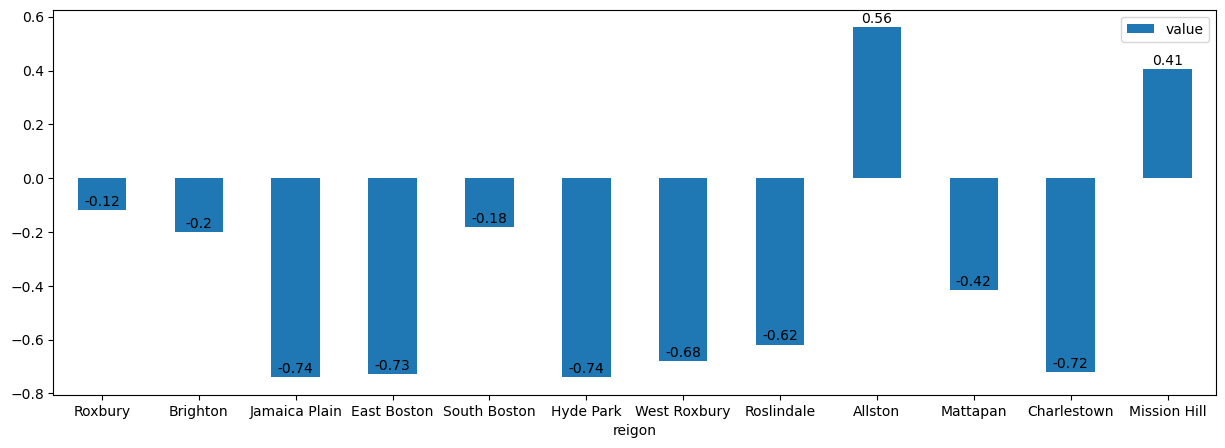

In [31]:
ax=df_corr.plot(kind='bar', x='reigon', y='value',rot=0,figsize=(15,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 6), textcoords='offset points')

In [ ]:
LLC MASS LLC', 'NEW{'Dorchester': [['HARBOR POINT APTS CO LESSEE', 'WASHINGTON COLUMBIA II MASS LPS', 'PNC ARHPF BLUE MOUNTAIN APTS LLC', 'TALBOT BERNARD HOUSING  FRANKLIN PARK LIMITED'], [83, 80, 73, 71, 67]], 'Brighton': [['CUMMINGS ROAD LLC MASS LLC', 'COMMONWEALTH PROPERTIES', 'LEO BIRMINGHAM NOMINEE TRUST', 'COMAVEN HOUSING ASSOC LPS', 'RESERVOIR PLACE CONDO TR'], [45, 38, 27, 25, 25]], 'East Boston': [['SOLSKINN PROPERTIES LLC', 'MCKINLEY INVESTMENT GROUP  LLC', 'EBSP ASSOCIATES LLC MASS LLC', 'PETER PAN PROPERTIES LLC MASS LLC', 'LAQUIDARA ROBERT'], [93, 73, 51, 36, 25]], 'Roslindale': [['HIGH POINT VILLAGE CO MASS LPS', 'HORIZON DEVELOPMENT LLC', 'THIRTY 3 HAYDN ST CONDO TR', 'CUMMINS TOWERS COMPANY', 'AMERICAN INVESTMENT GROUP    CORP'], [44, 26, 24, 23, 17]], 'Roxbury': [['NORTHAMPTON SQ CONDO ASSOC', 'KASANOF LAND LLC', 'DARTMOUTH HOTEL LP', 'LACONCHA LIMITED PARTNERSHIP', 'JPNDC  PITTS  LLC'], [174, 149, 65, 61, 52]], 'South Boston': [['RADCLIFFE RUSSELL F ETAL', 'COURT SQUARE PRESS BUILDING', 'CONNOLLY DIANE M', 'FOX STREET LLC', 'ARTS YVONNE M TS'], [53, 47, 38, 37, 34]], 'Hyde Park': [['GEORGETOWNE HOMES ONE LLC MASS LLC', 'GBM PORTFOLIO OWNER LLC', 'GEORGETOWNE HOMES TWO LLC MASS LLC', 'CESCO LLC MASS LLC', 'CANTERBURY VILLAGE CONDO TR'], [102, 62, 51, 44, 30]], 'Boston': [['MERCANTILE WHARF ASSOCIATES', 'CHARLES RIVER PARK D COMPANY', 'RIVIERA CONDOMINIUM ASSN', 'SYMPHONY PLAZA LEASEHOLD', 'LDJ DEVELOPMENT LLC'], [86, 65, 63, 60, 53]], 'West Roxbury': [['STONY BROOK CONDOMINIUM TR', 'BROADLAWN PK CONDOMINIUM TR', 'BC ROCKINGHAM GLEN LLC', 'BRACKETT KRISTINE TS', 'SOOHOO PAUL ETAL'], [56, 28, 26, 26, 24]], 'Charlestown': [['SHAUGHNESSY BRIAN F', 'MISHAWUM PARK TENANTS ASSOC', 'FLAGSHIP WHARF CONDO ASSN', '7 HANCOCK LLC', 'HURLEY PAULA A'], [25, 23, 21, 21, 19]], 'Mattapan': [['GBM PORTFOLIO OWNER LLC', 'BISMARCK STREET OWNER LLC', 'FERREIRA JOSE', 'NIU JIANGHE', 'WILMINGTON TRUST NATIONAL'], [260, 85, 48, 43, 38]], 'Mission Hill': [['SMITH SENIOR RESIDENCES LLC', 'EQR-BACK BAY MANOR LLC', 'LOWER ROXBURY APARTMENTS LP MASS LP', 'MPIII TOWNHOMES LLC', 'LONGWOOD APARTMENTS LLC'], [47, 30, 21, 20, 20]], 'Jamaica Plain': [['UNION-GREEN REALTY LLC MASS LLC', 'FORESTVALE APARTMENTS LP MASS LP', 'J P HOUSING LP', 'SOUTH STREET LJS LLC MASS LLC', 'GCB REALTY LLC'], [63, 52, 26, 25, 24]], 'Allston': [['NORTHGATE CONDO TRUST', 'LONG-GLEN RENTAL LLC MASS LLC', 'COMMGLEN LLC', 'NORA LLC MASS LLC', 'COMMONWEALTH 1144 LPS MASS LPS'], [47, 38, 30, 27, 26]], 
'Chestnut Hill': [['MAMALAKIS PHILIP', 'HV TH LLC', 'KURLAND ABRAHAM E', 'KELLER MARTIN D', 'AUSTER SIMONE'], [6, 5, 3, 3, 2]]}